# Static filter example

Note: This notebook is designed to run with CPU (no GPU) runtime.

Import modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models

Download the ORENIST dataset and store into NumPy arrays.

In [2]:
base_repo = 'https://github.com/enakai00/colab_GenAI_lecture'
!curl -LO {base_repo}/raw/main/Part01/ORENIST.data
with open('ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  553k  100  553k    0     0   740k      0 --:--:-- --:--:-- --:--:--  740k


Show some examples.

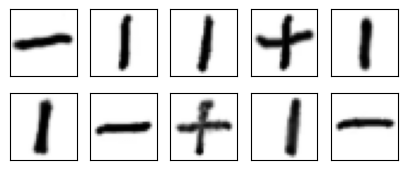

In [3]:
fig = plt.figure(figsize=(5, 2))
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(images[i].reshape(28, 28),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

Define fixed convolutional filters to extract vertical and horizontal edges.

In [4]:
def edge_filter(shape=None, dtype=None):
    filter0 = np.array(
            [[ 2, 1, 0,-1,-2],
             [ 3, 2, 0,-2,-3],
             [ 4, 3, 0,-3,-4],
             [ 3, 2, 0,-2,-3],
             [ 2, 1, 0,-1,-2]]) / 23.0
    filter1 = np.array(
            [[ 2, 3, 4, 3, 2],
             [ 1, 2, 3, 2, 1],
             [ 0, 0, 0, 0, 0],
             [-1,-2,-3,-2,-1],
             [-2,-3,-4,-3,-2]]) / 23.0

    filter_array = np.zeros([5, 5, 1, 2])
    filter_array[:, :, 0, 0] = filter0
    filter_array[:, :, 0, 1] = filter1

    return filter_array

Define a model to apply the fixed convolutional filters.

In [5]:
model1 = models.Sequential(name='conv_filter_model1')
model1.add(layers.Input(shape=(784,)))
model1.add(layers.Reshape((28, 28, 1), name='reshape'))
model1.add(layers.Conv2D(2, (5, 5), padding='same',
                         kernel_initializer=edge_filter,
                         bias_initializer=tf.constant_initializer(-0.2),
                         activation='relu', name='conv_filter'))

model1.summary()

Model: "conv_filter_model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_filter (Conv2D)                 │ (None, 28, 28, 2)           │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Apply the convolutional filters to the ORENIST dataset.

In [6]:
conv_output1 = model1.predict(np.array(images[:9]), verbose=0)

Show images after applying the convolutional filters.

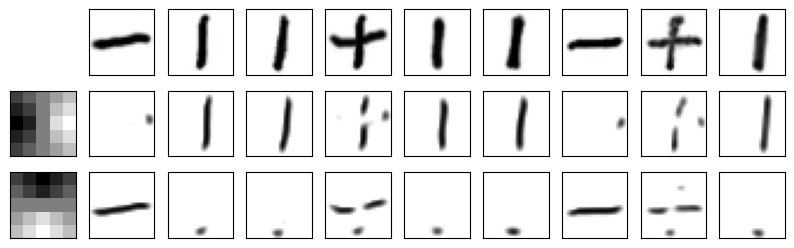

In [7]:
fig = plt.figure(figsize=(10, 3))
filter_vals = edge_filter()
v_max = np.max(conv_output1)

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i], cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(images[i].reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_output1[i, :, :, 0],
                   vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_output1[i, :, :, 1],
                   vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

Define a model to apply the fixed convolutional filters with  `strides=(2, 2)`

In [8]:
model2 = models.Sequential(name='conv_filter_model2')
model2.add(layers.Input(shape=(784,)))
model2.add(layers.Reshape((28, 28, 1), name='reshape'))
model2.add(layers.Conv2D(2, (5, 5), padding='same', strides=(2, 2),
                         kernel_initializer=edge_filter,
                         bias_initializer=tf.constant_initializer(-0.2),
                         activation='relu', name='conv_filter'))

model2.summary()

Model: "conv_filter_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_filter (Conv2D)                 │ (None, 14, 14, 2)           │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Apply the convolutional filters to the ORENIST dataset.

In [9]:
conv_output2 = model2.predict(np.array(images[:9]), verbose=0)

Show images after applying the convolutional filters with `strides=(2, 2)`

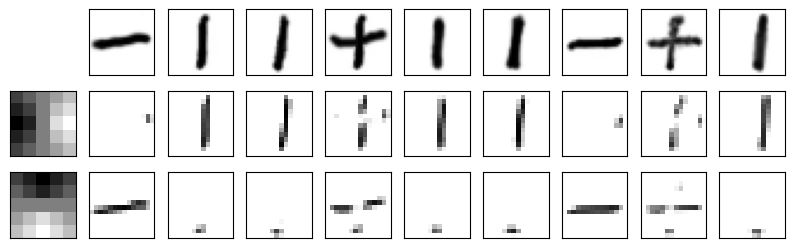

In [10]:
fig = plt.figure(figsize=(10, 3))
filter_vals = edge_filter()
v_max = np.max(conv_output2)

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i], cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(images[i].reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_output2[i, :, :, 0],
                   vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_output2[i, :, :, 1],
                   vmin=0, vmax=v_max, cmap=plt.cm.gray_r)